In [19]:
import pandas as pd

df = pd.read_csv('Bakery sales.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [21]:
df.isnull().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [22]:
df.isna().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [23]:
from collections import Counter
all_products_buy = Counter(df['article'])

In [24]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

/tmp/ipykernel_3061770/3811547182.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_sales, x='hour', y='Quantity', palette='viridis')


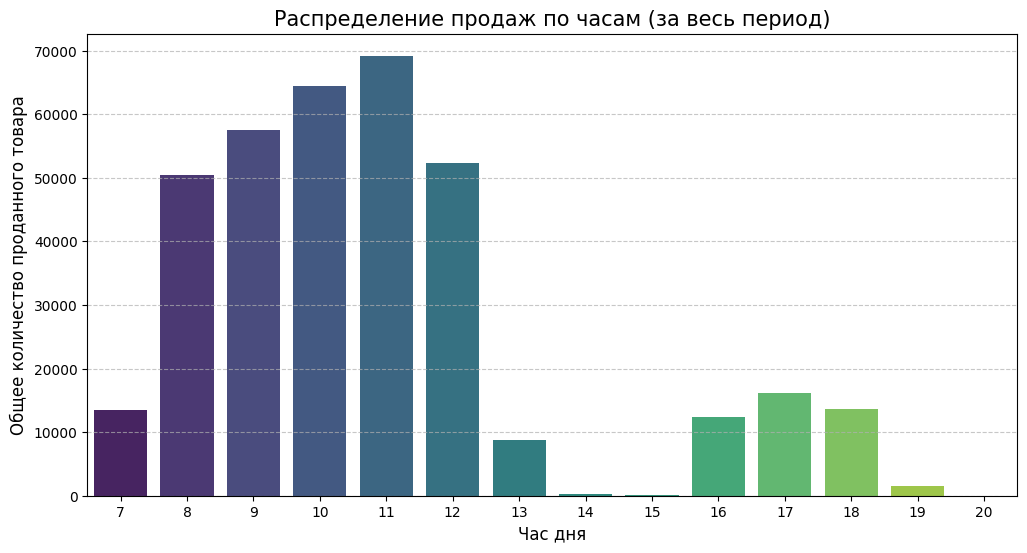

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hour_sales = df.groupby('hour')['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_sales, x='hour', y='Quantity', palette='viridis')

plt.title('Распределение продаж по часам (за весь период)', fontsize=15)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Общее количество проданного товара', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_3061770/2969421277.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='Quantity', y='article', palette='magma')


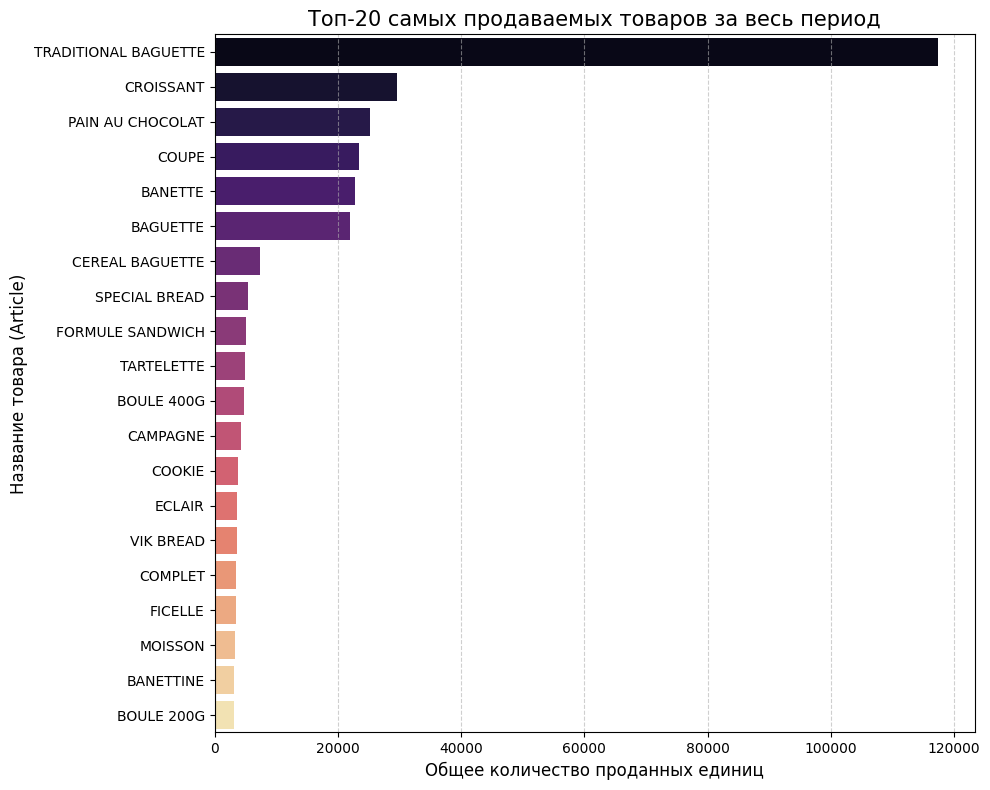

In [26]:
top_articles = df.groupby('article')['Quantity'].sum().sort_values(ascending=False).reset_index()

top_20 = top_articles.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_20, x='Quantity', y='article', palette='magma')

plt.title('Топ-20 самых продаваемых товаров за весь период', fontsize=15)
plt.xlabel('Общее количество проданных единиц', fontsize=12)
plt.ylabel('Название товара (Article)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

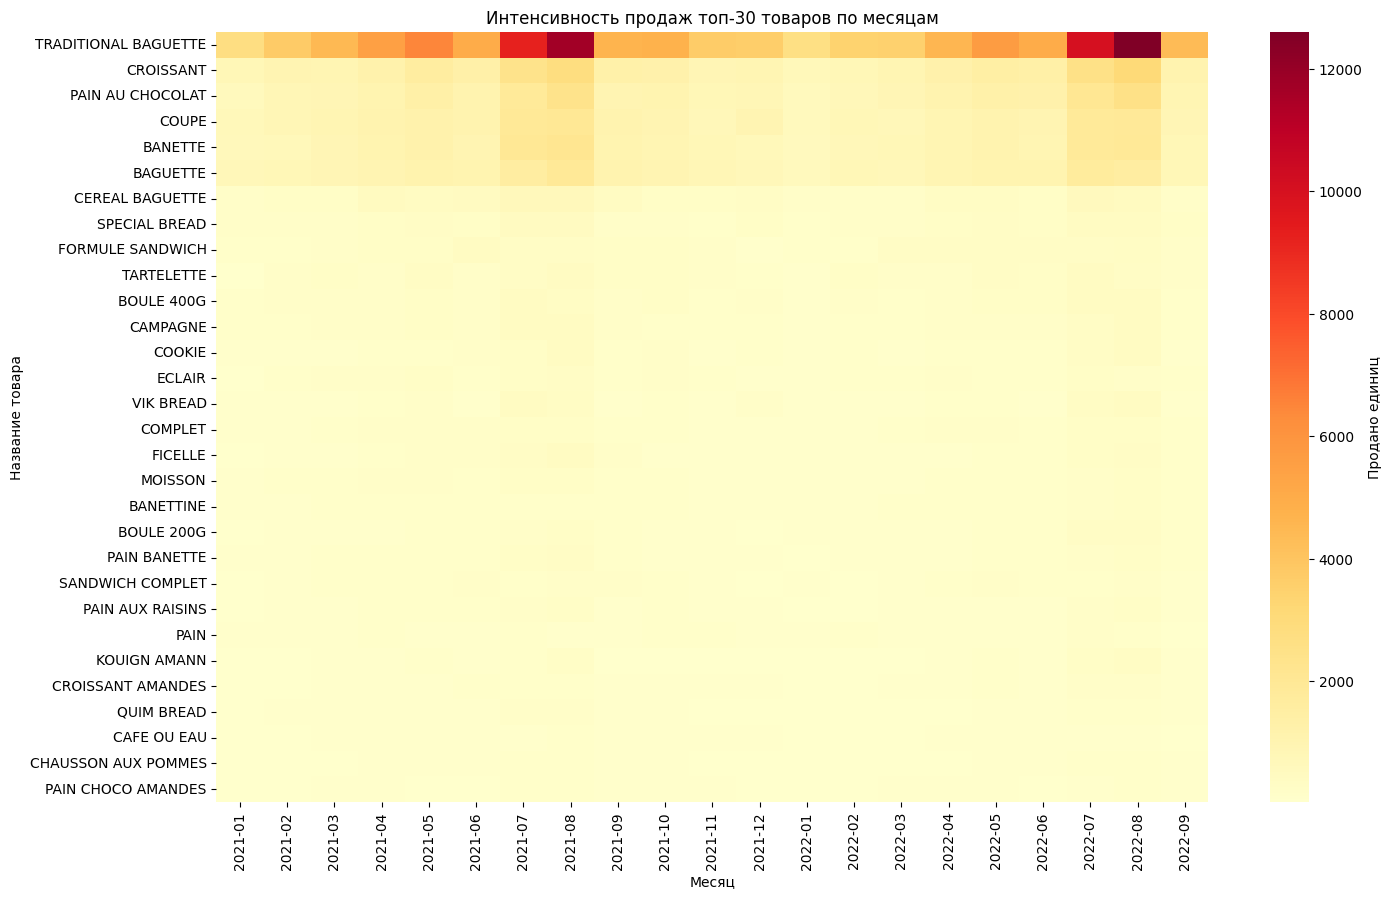

In [35]:
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')

pivot_df = df.groupby(['article', 'month_year'])['Quantity'].sum().unstack()

pivot_df_filtered = pivot_df.loc[df.groupby('article')['Quantity'].sum().nlargest(30).index]
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df_filtered, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Продано единиц'})
plt.title('Интенсивность продаж топ-30 товаров по месяцам')
plt.ylabel('Название товара')
plt.xlabel('Месяц')
plt.show()

In [39]:
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))
limit_time = '15:00:00'

daily_total = df.groupby(['date', 'article'])['Quantity'].sum().reset_index(name='total_day_qty')
sales_before = df[df['time'] < limit_time].groupby(['date', 'article'])['Quantity'].sum().reset_index(name='qty_before')
final_df = pd.merge(daily_total, sales_before, on=['date', 'article'], how='left').fillna(0)
final_df['target'] = (final_df['qty_before'] >= final_df['total_day_qty']).astype(int)

In [40]:
final_df

,date,article,total_day_qty,qty_before,target
0,2021-01-02,BAGUETTE,46.0,46.0,1
1,2021-01-02,BANETTE,40.0,40.0,1
2,2021-01-02,BANETTINE,6.0,6.0,1
3,2021-01-02,BOULE 200G,6.0,6.0,1
4,2021-01-02,BOULE 400G,11.0,11.0,1
...,...,...,...,...,...
29197,2022-09-30,SPECIAL BREAD KG,1.0,1.0,1
29198,2022-09-30,SUCETTE,1.0,0.0,0
29199,2022-09-30,TARTELETTE,3.0,3.0,1
29200,2022-09-30,TRADITIONAL BAGUETTE,141.0,102.0,0


In [44]:
final_df['day_of_week'] = final_df['date'].dt.dayofweek
final_df['month'] = final_df['date'].dt.month
final_df['is_weekend'] = final_df['day_of_week'].isin([5, 6]).astype(int)
final_df['article_cat'] = final_df['article'].astype('category').cat.codes
final_df.head(20)

,date,article,total_day_qty,qty_before,target,day_of_week,month,is_weekend,article_cat
0,2021-01-02,BAGUETTE,46.0,46.0,1,5,1,1,4
1,2021-01-02,BANETTE,40.0,40.0,1,5,1,1,7
2,2021-01-02,BANETTINE,6.0,6.0,1,5,1,1,8
3,2021-01-02,BOULE 200G,6.0,6.0,1,5,1,1,11
4,2021-01-02,BOULE 400G,11.0,11.0,1,5,1,1,12
5,2021-01-02,BOULE POLKA,2.0,2.0,1,5,1,1,13
6,2021-01-02,BRIOCHE,2.0,2.0,1,5,1,1,14
7,2021-01-02,CAFE OU EAU,6.0,6.0,1,5,1,1,21
8,2021-01-02,CAMPAGNE,10.0,10.0,1,5,1,1,23
9,2021-01-02,CEREAL BAGUETTE,19.0,19.0,1,5,1,1,25


In [45]:
final_df['target'].value_counts()

target
1    18044
0    11158
Name: count, dtype: int64

In [46]:
X = final_df[['article_cat', 'day_of_week', 'month', 'is_weekend']]
y = final_df['target']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import 
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.05, 0.2]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

In [60]:
predictions = grid.predict(X_test)

In [61]:
print("Матрица ошибок:")
print(confusion_matrix(y_test, predictions))
print("\nОтчет о классификации:")
print(classification_report(y_test, predictions))

Матрица ошибок:
[[1873 1568]
 [ 864 4456]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.68      0.54      0.61      3441
           1       0.74      0.84      0.79      5320

    accuracy                           0.72      8761
   macro avg       0.71      0.69      0.70      8761
weighted avg       0.72      0.72      0.72      8761

